#         IRIS SPECIES CLASSIFICATION

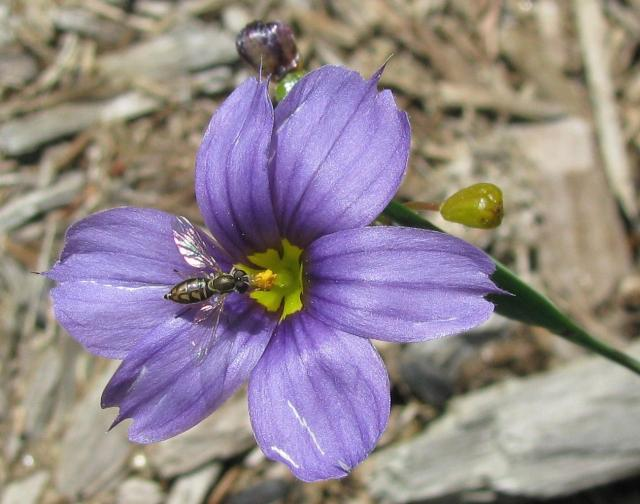

## Hello Kagglers ,This notebook contains the classification of iris species with reference to the provided dataset.In this notebook ,i made the classification  with only two different classifiers -> Decision Tree Classifier & k-Nearest Neighbor

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/database.sqlite
/kaggle/input/iris/Iris.csv


### importing the libraries which are necessary for classification, visulaization and other processing of the data

In [2]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
print('import successful')

import successful


#### As the provided dataset is already clean .There is no need for further cleaning

In [3]:
df = pd.read_csv('../input/iris/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### We read the dataset which is in the form of csv file using pandas
### The dataframe consist of 150 rows and 6 columns

In [4]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### The iris species is of three categories as per the provided data set

## The visualization provided below in the form of scatter plot has a clear view of the distribution of the three different types of the species with respect to PetalLengthCm','PetalWidthCm' as x_axis and 'SepalLengthCm','SepalWidthCm' as y_axis

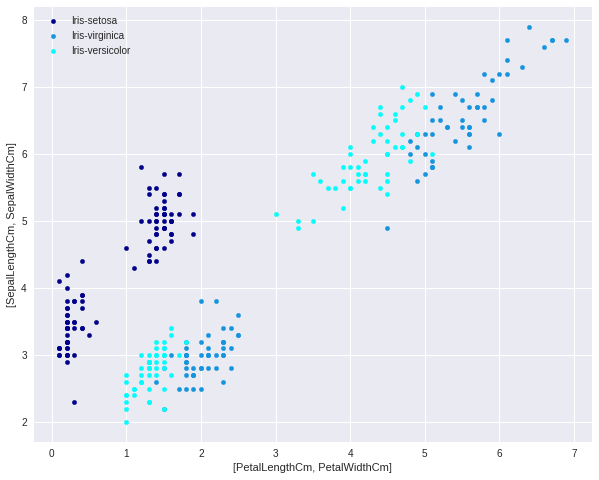

In [5]:
ax = plt.style.use('seaborn')
ax = df[df['Species']=='Iris-setosa'].plot(kind='scatter', x=['PetalLengthCm',
                                                              'PetalWidthCm'
                                                             ], y=['SepalLengthCm','SepalWidthCm'],
                                              color='DarkBlue', label='Iris-setosa', figsize=(10, 8))                                                            
df[df['Species']=='Iris-virginica'].plot(kind='scatter', x=['PetalLengthCm',
                                                            'PetalWidthCm'
                                                             ], y=['SepalLengthCm','SepalWidthCm'],
                                              color='#1695de', label='Iris-virginica', ax=ax)
df[df['Species']=='Iris-versicolor'].plot(kind='scatter', x=['PetalLengthCm',
                                                             'PetalWidthCm'
                                                             ], y=['SepalLengthCm', 'SepalWidthCm'],
                                              color='#03fcfc', label='Iris-versicolor', ax=ax)

plt.show()

## The below provided visualiztion shows the distribution with respect to petal length and petal width ,  also shows a fine and clear distribution

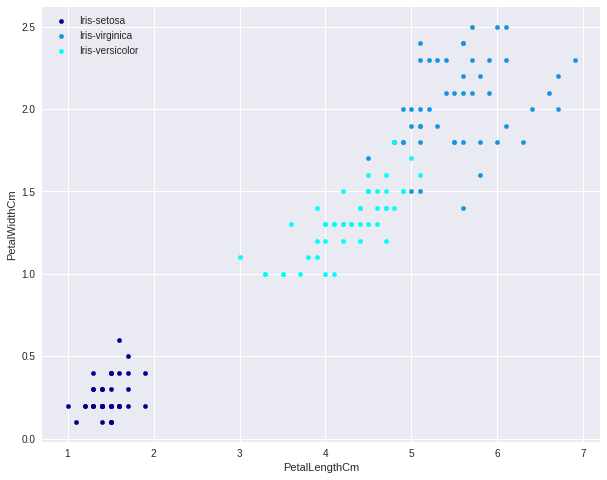

In [6]:
ax = df[df['Species']=='Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm',
                                              color='DarkBlue', label='Iris-setosa', figsize=(10, 8))    
df[df['Species']=='Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm',
                                              color='#1695de', label='Iris-virginica', ax=ax)
df[df['Species']=='Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm',
                                              color='#03fcfc', label='Iris-versicolor', ax=ax)

## In the below scatter plot the distribution of the species is made with respect to the sepal length and its sepal width but this visual is some what mixed between the species type of virginica and versicolor

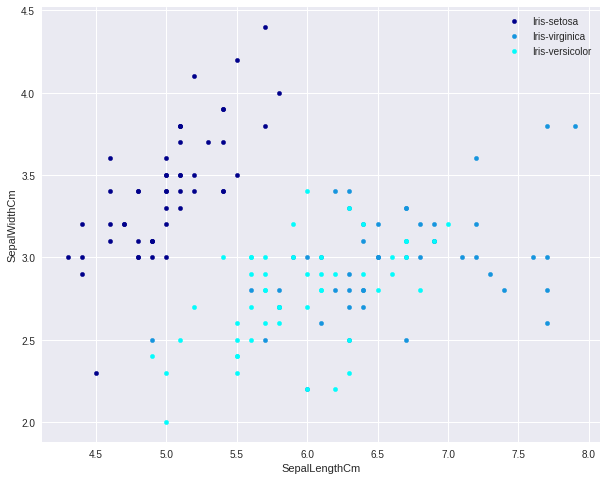

In [7]:
ax = df[df['Species']=='Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm',
                                              color='DarkBlue', label='Iris-setosa', figsize=(10, 8))                                                            
df[df['Species']=='Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm',
                                              color='#1695de', label='Iris-virginica', ax=ax)
df[df['Species']=='Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm',
                                              color='#03fcfc', label='Iris-versicolor', ax=ax)

## creating training and testing data is reqired to provide a good machine learning model

In [8]:
x = df[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']].values
x[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [9]:
y = df['Species'].values
y[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print('shape of x_train is {}'.format(x_train.shape))
print('shape of x_test is {}'.format(x_test.shape))
print('shape of y_train is {}'.format(y_train.shape))
print('shape of y_test is {}'.format(y_test.shape))

shape of x_train is (120, 4)
shape of x_test is (30, 4)
shape of y_train is (120,)
shape of y_test is (30,)


## for the training and testing data created .here we use the decision tree classifer for predicting the species 

In [11]:
iris_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3)
iris_classifier

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [12]:
iris_classifier.fit(x_train, y_train)
predict_iris = iris_classifier.predict(x_test)
result = pd.DataFrame(
    {'predicted': predict_iris,
     'actual_value': y_test
                      })
result

,predicted,actual_value
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa
5,Iris-virginica,Iris-virginica
6,Iris-setosa,Iris-setosa
7,Iris-versicolor,Iris-versicolor
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


### The above shown is the predicted value from the decision tree and the actual correct output of test data  as a dataframe 

In [13]:
accuracy_score = metrics.accuracy_score(y_test, predict_iris)
print('='*100)
print('The Decision Tree accuracy  for the iris classification is {}'.format(accuracy_score))
print('='*100)

The Decision Tree accuracy  for the iris classification is 0.9666666666666667


### The accuracy of the decision tree classifer is great and it proves to be a good model

## just for sake we'll try with another classifer to check how it predicts for the same train test split data. we use k nearest neighbor 

In [14]:
k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [15]:
yhat = neigh.predict(x_test)
result2 = pd.DataFrame({
    'predicted': yhat,
    'actual_value': y_test
})
result2

,predicted,actual_value
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa
5,Iris-virginica,Iris-virginica
6,Iris-setosa,Iris-setosa
7,Iris-versicolor,Iris-versicolor
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


In [16]:
print('='*40)
print('the train_set accuracy is {}'.format(metrics.accuracy_score(y_train, neigh.predict(x_train))))
print('\nthe test_set accuracy is {}'.format(metrics.accuracy_score(y_test, yhat)))
print('='*40)

the train_set accuracy is 0.95

the test_set accuracy is 1.0


## by seeing the results above, k nearest neighbor has the best accuracy when compared to the decision tree classification .The number of neighbor was just randomly chosen as 4 but to see what provides the best model accuracy a visualization is provided to see what would be the accuracy for different number of neighbors

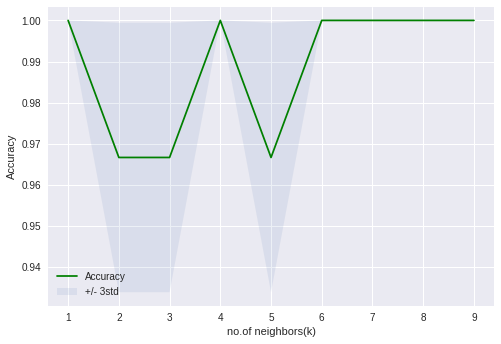

In [17]:
ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
confusion_mx = []
for n in range(1, ks):
    neigh =  KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test,yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc
plt.plot(range(1, ks), mean_acc, 'g')
plt.fill_between(range(1, ks), mean_acc-1*std_acc, mean_acc+1*std_acc,alpha=0.10)
plt.legend(('Accuracy', '+/- 3std'))
plt.ylabel('Accuracy')
plt.xlabel('no.of neighbors(k)')
plt.show()